# Procesamiento del Lenguaje Natural

In [1]:
import pandas as pd
import numpy as np
from gensim.utils import tokenize

## Ampliación del dataset
Utilizar la columna descripción para encontrar aspectos de una propiedad. Luego utilizar estos aspectos para crear nuevas columnas, ampliando el dataset original. Se proponen las siguientes técnicas para la detección de aspectos:

In [2]:
ds_psa = pd.read_csv("./work/properati_argentina_2021_tp2.csv")
ds_des = pd.read_csv("./work/properati_argentina_2021_decrip.csv")

In [3]:
ds_psa.tail()

,id,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_description
93720,v4f5Un9jO7hsD02MWLkKBQ==,-34.603245,-58.489810,Villa del Parque,Departamento,4,3,130.0,100.0,220000.0,['Hermoso piso de 130m2 totales (100m2 cubiert...
93721,Aq/Z+XyS8FHbOOxed4xtTw==,-34.614063,-58.482814,Villa del Parque,Departamento,3,2,68.0,60.0,161000.0,['Departamento de 3 ambientes MUY LUMINOSO al ...
93722,Rmamz8v4Wkh5xF7PA59Jqw==,-34.614175,-58.479062,Villa del Parque,Departamento,1,1,51.0,30.0,75500.0,"['VENTA mono ambiente con patio, al contra fre..."
93723,7yl8Dfx5wobH21YdMU+Kgg==,-34.614175,-58.479062,Villa del Parque,Departamento,1,1,37.0,31.0,74500.0,"['VENTA de monoambiente divisible, con balcon ..."
93724,9OVDfhoDvkY4rr/SX0ggVw==,-34.599790,-58.373411,Centro / Microcentro,Departamento,2,1,84.0,84.0,135000.0,['Corredor Responsable: Diego Enrique Mastrang...


In [4]:
"""ds_psa["property_description"] = np.nan
for i, row in ds_psa.iterrows():
    descripcion = ds_des.loc[ds_des['id'] == ds_psa.at[i,"id"]].property_description
    ds_psa.at[i,"property_description"] = descripcion
    """


'ds_psa["property_description"] = np.nan\nfor i, row in ds_psa.iterrows():\n    descripcion = ds_des.loc[ds_des[\'id\'] == ds_psa.at[i,"id"]].property_description\n    ds_psa.at[i,"property_description"] = descripcion\n    '

In [5]:
ds_psa.to_csv('./work/properati_argentina_2021_tp2_filtrado.csv', index=False)

Una vez asociadas las descripciones con las publicaciones, ya no es necesario mantener los ids en la tabla

In [6]:
ds_psa.drop("id",axis=1, inplace=True)

Se observan las descripciones cargadas según el id

In [7]:
ds_psa.head()

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_description
0,-34.590293,-58.455816,Once,Casa,4,3,171.000000,133.0,210000.0,['Corredor Responsable: Daniel Aibe - CMCPD 11...
1,-34.637319,-58.361124,Boca,Departamento,3,2,58.000000,55.0,82900.0,['Corredor Responsable: Gustavo Guastello - C....
2,-34.628647,-58.361871,Boca,Departamento,4,3,70.000000,70.0,99000.0,['Formando parte del Barrio Catalinas Sur: Car...
3,-34.610027,-58.401934,Once,Departamento,4,2,130.481720,104.0,146000.0,['Luminoso 4 ambientes<br><br>2 dormitorios am...
4,-34.631621,-58.416825,Boedo,PH,4,2,103.012368,73.0,250000.0,"['EXELENTE PH, CON QUINCHO SEMICUBIERTO Y TERR..."


Análisis de elementos duplicados

In [8]:
ds_psa.property_description.duplicated().sum()

13185

In [9]:

ds_des.property_description.duplicated().sum()

67045

En el dataset de descripciones, se observan alrededor de 67 mil descripciones iguales, mientras que en el dataset con las publicaciones hay 13 mil descripciones duplicadas

In [10]:
ds_psa[ds_psa.duplicated(keep=False)]#.groupby("property_description", group_keys=True).apply(lambda x: x)

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_description
11,-34.630538,-58.419221,Boedo,Departamento,3,2,50.000000,50.000000,95000.0,['Muy luminoso 3 ambientes con baulera sobre l...
28,-34.549396,-58.470990,Nuñez,Departamento,3,2,68.000000,68.000000,164000.0,['VENTA 3 AMPLIOS AMBIENTES PISO ALTO EN NUÑEZ...
37,-34.563673,-58.480740,Coghlan,Departamento,1,1,22.000000,22.000000,54000.0,['DPTO en VENTA en Coghlan<br><br> MONOAMBIEN...
48,-34.576741,-58.404830,Palermo,Departamento,6,4,400.000000,309.266279,2700000.0,['Excelente Departamento ubicado en una situac...
49,-34.576741,-58.404830,Palermo,Departamento,6,4,400.000000,309.266279,2700000.0,['Excelente Departamento ubicado en una situac...
...,...,...,...,...,...,...,...,...,...,...
93678,-34.599486,-58.432429,Villa Crespo,Departamento,2,2,40.000000,36.000000,100000.0,['EXCELENTE 2 AMBIENTES A LA CALLE CON BALCÓN...
93679,-34.599486,-58.432429,Villa Crespo,Departamento,2,2,40.000000,36.000000,100000.0,['EXCELENTE 2 AMBIENTES A LA CALLE CON BALCÓN...
93680,-34.597562,-58.445137,Villa Crespo,Departamento,4,2,87.103961,52.000000,110000.0,"['Departamento de 52m2 cub, 1er. piso contrafr..."
93718,-34.614232,-58.479161,Villa Santa Rita,Departamento,1,1,37.000000,31.000000,74500.0,"['VENTA Monoambiente divisible, con balcón al ..."


Por otro lado, analizando las publicaciones que son completamente iguales, se observan 11348 publicaciones. Las cuales al coincidir desde la ubicaciones, propiedades del inmueble y descripción, pueden considerarse elementos repetidos, y se procederá a eliminarlos.

In [11]:
ds_psa.drop_duplicates(keep='first',inplace=True)
ds_psa.duplicated().sum()

0

In [12]:
ds_psa.property_description.isna().sum() 

0

### Minqing Hu y Bing Liu
Basada en frecuencia y palabras que indican “carga de valor” . Puede ser necesario realizar algunas modificaciones sobre la técnica.

Para encontrar la carga de valor de las descripciones, es necesario tokenizar las palabras y como herramienta, se propone tokenize de gensim. La carga de valor será determinada por la cantidad de ocurrencias de las palabras de la descripción en el lexicón de sentimientos ("positive_words_es.txt" y "negative_words_es.txt") que se obtuvo de https://www.kaggle.com/datasets/rtatman/sentiment-lexicons-for-81-languages

Muestra de la tokenización con tokenize, tomando por ejemplo la primer descripción del dataset, tokenize no tiene en cuenta los ":" ni el "-", ni los números, además se dejaron las palabras en minúscula, dado que ese es el formato del lexicón.

In [13]:
ds_psa.head(1).property_description

0    ['Corredor Responsable: Daniel Aibe - CMCPD 11...
Name: property_description, dtype: object

In [14]:
list(tokenize(ds_psa.at[0,"property_description"], to_lower=True))

['corredor',
 'responsable',
 'daniel',
 'aibe',
 'cmcpd',
 'contacto',
 'verónica',
 'cardozo',
 'mls',
 'id',
 'proyecto',
 'de',
 'casa',
 'llave',
 'en',
 'mano',
 'en',
 'el',
 'barrio',
 'senderos',
 'iii',
 'lote',
 'n',
 'de',
 'costa',
 'esmeralda',
 'superficie',
 'cubierta',
 'm',
 'superficie',
 'semicubierta',
 'm',
 'superficie',
 'del',
 'terreno',
 'm',
 'la',
 'casa',
 'está',
 'distribuida',
 'en',
 'una',
 'sola',
 'planta',
 'y',
 'consta',
 'de',
 'ambientes',
 'dormitorios',
 'uno',
 'de',
 'ellos',
 'en',
 'suite',
 'con',
 'vestidor',
 'y',
 'los',
 'dos',
 'restantes',
 'con',
 'un',
 'baño',
 'para',
 'compartir',
 'y',
 'un',
 'toilette',
 'a',
 'su',
 'vez',
 'posee',
 'un',
 'amplio',
 'living',
 'comedor',
 'con',
 'aire',
 'acondicionado',
 'cocina',
 'integrada',
 'con',
 'barra',
 'desayunadora',
 'lavadero',
 'con',
 'mesada',
 'y',
 'una',
 'hermosa',
 'galería',
 'con',
 'parrilla',
 'deck',
 'y',
 'salida',
 'al',
 'jardín',
 'donde',
 'se',
 'ubica

Por otro lado, usando el split normal:

In [15]:
ds_psa.at[0,"property_description"].split()

["['Corredor",
 'Responsable:',
 'Daniel',
 'Aibe',
 '-',
 'CMCPD',
 '1155Contacto:',
 'Verónica',
 'Cardozo',
 '-',
 'MLS',
 'ID',
 '#',
 '420351068-8Proyecto',
 'de',
 'casa',
 'llave',
 'en',
 'mano',
 'en',
 'el',
 'Barrio',
 'Senderos',
 'III,',
 'Lote',
 'n°',
 '435,',
 'de',
 'Costa',
 'Esmeralda:',
 'Superficie',
 'Cubierta:',
 '133',
 'M2.',
 'Superficie',
 'Semicubierta:',
 '38',
 'M2',
 'Superficie',
 'del',
 'Terreno:',
 '923,99',
 'M2.La',
 'casa',
 'está',
 'distribuida',
 'en',
 'una',
 'sola',
 'planta',
 'y',
 'consta',
 'de',
 '4',
 'ambientes,',
 '3',
 'dormitorios,',
 'uno',
 'de',
 'ellos',
 'en',
 'suite',
 'con',
 'vestidor',
 'y',
 'los',
 'dos',
 'restantes',
 'con',
 'un',
 'baño',
 'para',
 'compartir',
 'y',
 'un',
 'toilette.',
 'A',
 'su',
 'vez,',
 'posee',
 'un',
 'amplio',
 'living',
 'comedor',
 'con',
 'aire',
 'acondicionado,',
 'cocina',
 'integrada',
 'con',
 'barra',
 'desayunadora,',
 'lavadero',
 'con',
 'mesada',
 'y',
 'una',
 'hermosa',
 'gal

Se observa que se incluyen muchas más cosas con los corchetes, guiones, etc.

Agregado de columnas tokenizadas al dataframe

In [16]:
ds_psa["tokenized_description"] = ''

In [17]:
ds_psa.head()

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_description,tokenized_description
0,-34.590293,-58.455816,Once,Casa,4,3,171.000000,133.0,210000.0,['Corredor Responsable: Daniel Aibe - CMCPD 11...,
1,-34.637319,-58.361124,Boca,Departamento,3,2,58.000000,55.0,82900.0,['Corredor Responsable: Gustavo Guastello - C....,
2,-34.628647,-58.361871,Boca,Departamento,4,3,70.000000,70.0,99000.0,['Formando parte del Barrio Catalinas Sur: Car...,
3,-34.610027,-58.401934,Once,Departamento,4,2,130.481720,104.0,146000.0,['Luminoso 4 ambientes<br><br>2 dormitorios am...,
4,-34.631621,-58.416825,Boedo,PH,4,2,103.012368,73.0,250000.0,"['EXELENTE PH, CON QUINCHO SEMICUBIERTO Y TERR...",


In [18]:
for i, row in ds_psa.iterrows():
    tokens = list(tokenize(ds_psa.at[i,"property_description"], to_lower=True))
    ds_psa.at[i,"tokenized_description"] = tokens

In [19]:
ds_psa.tokenized_description.head()

0    [corredor, responsable, daniel, aibe, cmcpd, c...
1    [corredor, responsable, gustavo, guastello, c,...
2    [formando, parte, del, barrio, catalinas, sur,...
3    [luminoso, ambientes, br, br, dormitorios, amp...
4    [exelente, ph, con, quincho, semicubierto, y, ...
Name: tokenized_description, dtype: object

Columna final con las palabras tokenizadas, las cuales ya pueden ser procesadas

In [20]:
serie_tokens = ds_psa.tokenized_description
dict_tokens = {}
for tokens in serie_tokens:
    for word in tokens:
        try:
            dict_tokens[word] +=1
        except:
            dict_tokens[word] = 1

Se observan que las 20 palabras más frecuentes son artículos y conectores

In [21]:
count_tokens = pd.Series(dict_tokens)
count_tokens = count_tokens.sort_values(ascending=False)
count_tokens[0:20]

de        1080661
br         927730
y          649959
con        521074
la         416112
en         395503
a          359243
el         282460
del        191436
que        176365
por        168689
al         167293
las        150465
un         136422
los        135899
para       123990
se         107396
n          103951
cocina     103890
no          98796
dtype: int64

Las siguientes 20 hacen referencia en su mayoría a descripciones de ambientes, como baño, comedor, living, balcón, entre otros.
Se destaca completo, muy como palabras positivas a agregar.
En caso de querer analizar las características positivas de una publicación, se pueden tomar baño, comedor, living, balcón, edificio, dormitorio como candidatos.

In [22]:
count_tokens[20:40]

baño            86479
ambientes       84090
comedor         78652
piso            78359
m               77749
propiedad       75650
living          73603
son             70005
es              69123
departamento    68569
balcón          66788
muy             66427
una             65187
edificio        62057
av              59411
x               59031
o               56503
completo        56456
dormitorio      55839
esta            53811
dtype: int64

Las siguientes 20 más frecuentes muestran palabras positivas como excelente, responsable, valor, amplio.

Para el análisis de la propiedad, se puede tener en cuenta expensas, inmueble, casa, placard, dormitorios, lavadero

In [23]:
count_tokens[40:60]

pisos          53305
frente         52761
corredor       51548
valor          51419
expensas       50966
excelente      50333
inmueble       48666
medidas        47931
responsable    47255
amplio         42616
tu             42005
casa           41676
dos            41577
cuenta         41087
placard        39481
hasta          38568
dormitorios    37616
lavadero       37045
cucicba        36873
c              36847
dtype: int64

En las siguiente 20, podemos ver palabras positivas como luminoso, vista, gran, contacto, ley, aire, salida; algunas negativas como préstamo, cuota.

In [24]:
count_tokens[60:80]

cuadras     36734
luminoso    35695
venta       35318
terraza     34929
lendar      34472
préstamo    34258
gran        34072
cuota       33676
ley         33472
contacto    33112
querés      32894
podés       32364
simulá      31887
accedé      31845
id          31674
mls         31669
vista       31172
personas    30582
salida      30396
aire        29699
dtype: int64

Finalmente, en las últimas 20 de las 100 palabras más frecuentes, se observan espacio, cochera, independiente, ubicación, principal, ubicado, servicio, acceso como posibles candidatos.

In [25]:
count_tokens[80:100]

espacio          29589
cochera          28589
inmobiliario     28401
planta           28073
metros           27834
zona             27405
independiente    27300
encuentra        27293
parte            27215
patio            27177
comprá           26143
ubicación        25995
principal        25798
todos            25640
barrio           25416
todas            25328
servicio         25297
ubicado          25156
acceso           24626
mesada           24321
dtype: int64

Entre las 100 palabras analizadas, se pudo ver que casi todas las palabras tienen una carga positiva, siendo las de carga negativa referentes a préstamos y expensas.

In [26]:
palabras_positivas = ["cocina","baño", "ambientes", "comedor", "propiedad","living",
                      "departamento","balcón","completo","edificio","dormitorio",
                      "frente","valor","excelente","responsable","amplio","placard",
                      "dormitorios","lavadero","luminoso", "terraza","vista", "espacio",
                      "cochera","zona","independiente","patio","principal","servicio","acceso"]
palabras_negativas = ["expensas","cuota","ley","préstamo",]
print(f"Cantidad de palabras positivas: {len(palabras_positivas)} ")
print(f"Cantidad de palabras negativas: {len(palabras_negativas)} ")

Cantidad de palabras positivas: 30 
Cantidad de palabras negativas: 4 


Se pudieron extraer 30 palabras positivas y 4 negativas de las 100 más frecuentes

<AxesSubplot:>

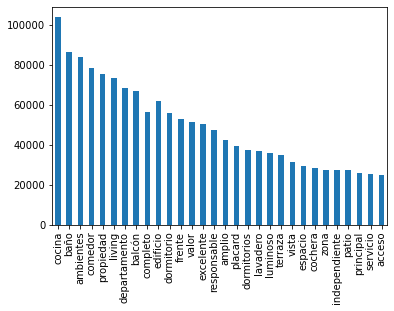

In [27]:
count_tokens[palabras_positivas].plot.bar()

<AxesSubplot:>

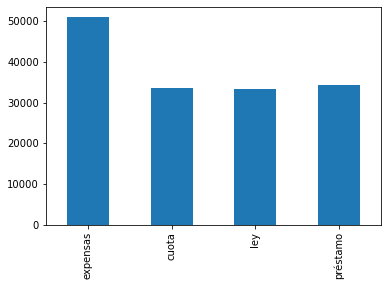

In [28]:
count_tokens[palabras_negativas].plot.bar()

Se observa además, que la frecuencia entre las palabras negativas es más uniforme en comparación de las positivas

Agregado de las palabras en sus correspondientes lexicones

In [29]:
words_n = pd.read_csv('./work/negative_words_es.txt')
words_n.loc[len(words_n)] = words_n.columns[0]

words_n.rename(columns = {words_n.columns[0]:'negative_words'}, inplace = True)
for word in palabras_negativas:
    words_n.loc[len(words_n)] = word

words_n.drop_duplicates(keep="first")
words_n.to_csv("./work/negative_words_es.csv", index=False)

In [30]:
words_p = pd.read_csv('./work/positive_words_es.txt')
words_p.loc[len(words_n)] = words_p.columns[0]

words_p.rename(columns = {words_p.columns[0]:'positive_words'}, inplace = True)
for word in palabras_positivas:
    words_p.loc[len(words_p)] = word

words_p.drop_duplicates(keep="first")
words_p.to_csv("./work/positive_words_es.csv", index=False)

Cálculo de los scores por descripción

In [31]:
def property_score(property_description_tokenized):
    score = 0
    for palabra in property_description_tokenized:
        if(palabra in words_p.positive_words.values):
            score +=1
        if (palabra in words_n.negative_words.values):
            score -=1
            
    return score

Ejemplo de uso del property_score, en este caso préstamo fue una de las palabras negativas agregadas en base al análisis de las descripciones

In [32]:
print(property_score(["préstamo"]))

-1


In [33]:
print(property_score(ds_psa.at[0,"tokenized_description"]))

-2


In [34]:
ds_psa["property_description_score"] = np.nan
for i, row in ds_psa.iterrows():
    score = property_score(ds_psa.at[i,"tokenized_description"])
    ds_psa.at[i,"property_description_score"] = score

In [35]:
#ds_psa = pd.read_csv('./work/properati_argentina_2021_tp2_filtrado.csv')

In [36]:
ds_psa.to_csv('./work/properati_argentina_2021_tp2_filtrado.csv', index=False)

In [37]:
ds_psa = pd.read_csv('./work/properati_argentina_2021_tp2_filtrado.csv')

In [38]:
#ds_psa["property_description_score"] = ds_psa.tokenized_description

La columna con los scores fue completamente cargada

In [39]:
ds_psa.property_description_score

0        -2.0
1        21.0
2        11.0
3         5.0
4         6.0
         ... 
86478    19.0
86479    17.0
86480     6.0
86481     1.0
86482    10.0
Name: property_description_score, Length: 86483, dtype: float64

Se observa que la media de los scores es 10

In [40]:
ds_psa.property_description_score.mean()

10.755292947746955

In [41]:
ds_psa.property_description_score.max()

104.0

In [42]:
ds_psa.property_description_score.min()

-59.0

Siendo sus extremos -59 y 104 respectivamente

<AxesSubplot:ylabel='Density'>

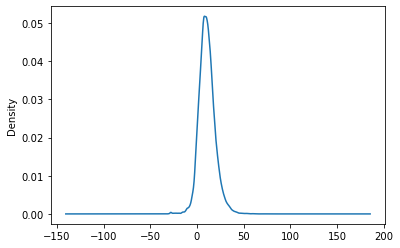

In [43]:
ds_psa.property_description_score.plot.density()

Se puede observar que la mayor concentración se encuentra entre 0 y 50

Además al salir del intervalo (-50,50) la cantidad de observaciones no es tan elevada

In [44]:
ds_psa.property_description_score[ds_psa.property_description_score < -50].sum()

-268.0

In [45]:
ds_psa.property_description_score[ds_psa.property_description_score > 50].sum()

5423.0

Teniendo en cuenta que no hay muchas observaciones con scores menores o mayores al del intervalo, se propone hacer una división entera por 10 de los scores

<AxesSubplot:ylabel='Density'>

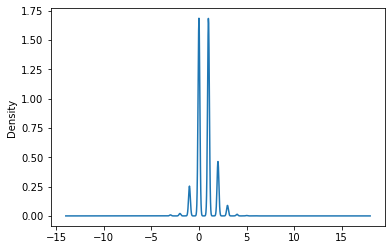

In [46]:
scores_reescalados = (ds_psa.property_description_score //10)
scores_reescalados.plot.density()

In [47]:
scores_reescalados.mean()

0.6264236902050114

Se observa que la media fue alterada, ahora da como resultado un valor entre 0 y 1

### Regex con criterio de automatización ELEGIR CRITERIO
con algún criterio de automatización teniendo en cuenta frases o valores repetidos. Obs: si se utilizó regex en el TP1 se debe proponer un criterio diferente al utilizado anteriormente.

In [48]:
import re

In [49]:
"""def cercano_a_transporte_publico(propiedad):
    descript = propiedad.property_description
    transporte_publico = re.search("subte", descript, re.IGNORECASE) # Este lo tengo que subte, tren, estacion, etc
    if transporte_publico is not None:
        return True
    return False"""

sinonimos_transporte = ['tren', 'subte', 'estaci[óo]n', 'colectivo', 'colectivos', 'metrob[uú]s', 'ecobici']

def cercano_a_transporte_publico(propiedad):
    for transporte in sinonimos_transporte:
        transportes = re.findall(transporte, propiedad.property_description, flags=re.IGNORECASE)
        if(len(transportes) > 0):
            break
    return 1 if len(transportes) > 0 else 0

In [50]:
ds_psa.property_description[0]

"['Corredor Responsable: Daniel Aibe - CMCPD 1155Contacto: Verónica Cardozo - MLS ID # 420351068-8Proyecto de casa llave en mano en el Barrio Senderos III, Lote n° 435, de Costa Esmeralda:                    Superficie Cubierta: 133 M2.              Superficie Semicubierta: 38 M2              Superficie del Terreno: 923,99 M2.La casa está distribuida en una sola planta y consta de 4 ambientes, 3 dormitorios, uno de ellos en suite con vestidor y los dos restantes con un baño para compartir y un toilette. A su vez, posee un amplio living comedor con aire acondicionado, cocina integrada con barra desayunadora, lavadero con mesada y una hermosa galería con parrilla, deck y salida al jardín, donde se ubica una pileta de 3 x 7 metros.La casa se entrega con llave en mano e incluye:- Living comedor: mesa con 8 sillas, aire acondicionado y cortinas.- Cocina: anafe de cocina a gas con 4 hornallas, horno de embutir eléctrico, heladera con frizzer y muebles de cocina.- Dormitorios: cama matrimonia

In [51]:
ds_psa["transporte_publico_cercano"] =  ds_psa.apply(lambda propiedad : cercano_a_transporte_publico(propiedad), axis = 1)

In [52]:
len(ds_psa.loc[ds_psa['transporte_publico_cercano'] == 1])

41524

41524 propiedades dicen estar cercanas a una estación de tren, subte, a paradas de colectivos/metrobus y/o ecobici

In [53]:
sinonimos_comodidades = ['cochera', 'garage', 'garaje', 'estacionamiento','parrilla', 'pileta', 'piscina', 'jardin', 'sum', 'balc[oó]n', 'sauna', 'gimnasio', 'inteligente', 'inteligencia', 'suite']

def tiene_comodidades(propiedad):
    for comodidad in sinonimos_comodidades:
        comodidades = re.findall(comodidad, propiedad.property_description, flags=re.IGNORECASE)
        if(len(comodidades) > 0):
            break
    return 1 if len(comodidades) > 0 else 0

In [54]:
ds_psa["tiene_comodidades"] =  ds_psa.apply(lambda propiedad : tiene_comodidades(propiedad), axis = 1)

In [55]:
len(ds_psa.loc[ds_psa['tiene_comodidades'] == 1])

68635

68635 propiedades tienen comodidades más lujosas

## Modelos
Entrenar un modelo XGBoost para regresión con el nuevo dataset ampliado considerando los siguientes escenarios

In [56]:
ds_psa.head()

,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_description,tokenized_description,property_description_score,transporte_publico_cercano,tiene_comodidades
0,-34.590293,-58.455816,Once,Casa,4,3,171.000000,133.0,210000.0,['Corredor Responsable: Daniel Aibe - CMCPD 11...,"['corredor', 'responsable', 'daniel', 'aibe', ...",-2.0,0,1
1,-34.637319,-58.361124,Boca,Departamento,3,2,58.000000,55.0,82900.0,['Corredor Responsable: Gustavo Guastello - C....,"['corredor', 'responsable', 'gustavo', 'guaste...",21.0,0,1
2,-34.628647,-58.361871,Boca,Departamento,4,3,70.000000,70.0,99000.0,['Formando parte del Barrio Catalinas Sur: Car...,"['formando', 'parte', 'del', 'barrio', 'catali...",11.0,0,1
3,-34.610027,-58.401934,Once,Departamento,4,2,130.481720,104.0,146000.0,['Luminoso 4 ambientes<br><br>2 dormitorios am...,"['luminoso', 'ambientes', 'br', 'br', 'dormito...",5.0,0,1
4,-34.631621,-58.416825,Boedo,PH,4,2,103.012368,73.0,250000.0,"['EXELENTE PH, CON QUINCHO SEMICUBIERTO Y TERR...","['exelente', 'ph', 'con', 'quincho', 'semicubi...",6.0,1,1


In [57]:
oh_place = pd.get_dummies(ds_psa['place_l3'])
ds_psa = ds_psa.drop('place_l3',axis = 1)
ds_psa = ds_psa.join(oh_place)

In [58]:
oh_type = pd.get_dummies(ds_psa['property_type'])
ds_psa = ds_psa.drop('property_type',axis = 1)
ds_psa = ds_psa.join(oh_type)

In [59]:
ds_psa.head()

,latitud,longitud,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_description,tokenized_description,property_description_score,...,Villa Pueyrredón,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque,Casa,Departamento,PH
0,-34.590293,-58.455816,4,3,171.000000,133.0,210000.0,['Corredor Responsable: Daniel Aibe - CMCPD 11...,"['corredor', 'responsable', 'daniel', 'aibe', ...",-2.0,...,0,0,0,0,0,0,0,1,0,0
1,-34.637319,-58.361124,3,2,58.000000,55.0,82900.0,['Corredor Responsable: Gustavo Guastello - C....,"['corredor', 'responsable', 'gustavo', 'guaste...",21.0,...,0,0,0,0,0,0,0,0,1,0
2,-34.628647,-58.361871,4,3,70.000000,70.0,99000.0,['Formando parte del Barrio Catalinas Sur: Car...,"['formando', 'parte', 'del', 'barrio', 'catali...",11.0,...,0,0,0,0,0,0,0,0,1,0
3,-34.610027,-58.401934,4,2,130.481720,104.0,146000.0,['Luminoso 4 ambientes<br><br>2 dormitorios am...,"['luminoso', 'ambientes', 'br', 'br', 'dormito...",5.0,...,0,0,0,0,0,0,0,0,1,0
4,-34.631621,-58.416825,4,2,103.012368,73.0,250000.0,"['EXELENTE PH, CON QUINCHO SEMICUBIERTO Y TERR...","['exelente', 'ph', 'con', 'quincho', 'semicubi...",6.0,...,0,0,0,0,0,0,0,0,0,1


In [60]:
ds_xgboost = ds_psa.drop(['property_description', 'tokenized_description'], axis=1)

In [61]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

In [70]:
#selecciono variables regresoras y a predecir
X = ds_xgboost[['property_rooms', 'property_bedrooms']]
y = ds_xgboost[['property_price']]

#Separacion Train/test  (80/20) según lo pedido
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=2)

### Utilizar los mismos hiperparámetros seleccionados en el tp1

In [71]:
# Hiperparámetros seleccionados en el TP1:
params_grid = {'learning_rate':[0.3], 
              'max_depth':[21], 
              'subsample':[0.5],
              'colsample_bytree':[0.6],
              'n_estimators':[15],
              'objective':['reg:squarederror'],
              'eval_metric':['rmse'],
              'seed':[2]
}

#Clasificador XGBoost
xgbr=XGBRegressor()

#Random Search con 10 Folds 
grid = RandomizedSearchCV(xgbr, params_grid, cv=10, scoring='neg_root_mean_squared_error', n_iter=1, random_state=2)

grid.fit(X_train, y_train)

RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate...
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   n_iter=1,
                   param_distributions={'colsample_bytree': [0.6],
                                        'eval_metric': ['rmse'],
                                        'learning_rate': [0.3],
                                        'max_depth': [21], 'n_estimators': [15],
                                        'objective': ['reg:squarederror'],
                                        'seed': [2], 'subsample': [0.5]},
                   random_state=2, scoring='neg_root_mean_squared_error')

In [72]:
#Predicción
y_pred_train= grid.predict(X_train)
y_pred_test= grid.predict(X_test)

In [73]:
#Metricas de los modelos
r2_train = r2_score(y_train, y_pred_train)
r2_test= r2_score(y_test, y_pred_test)

print(f"El R2 del modelo para el precio en entrenamiento es: {r2_train}")
print(f"El R2 del modelo para el precio en test es: {r2_test}")

El R2 del modelo para el precio en entrenamiento es: 0.3164454124468953
El R2 del modelo para el precio en test es: 0.32076460028540554


### Utilizar hiperparámetros optimizados con el nuevo dataset ampliado

Buscamos los hiperparámetros optimizados para el nuevo dataset

In [66]:
params_grid = {'learning_rate':np.arange(0,1,0.1), 
              'max_depth':range(1,25,1), 
              'subsample':np.arange(0,1,0.1),
              'colsample_bytree':np.arange(0,1,0.1),
              'n_estimators':range(1,20,2),
              'objective':['reg:squarederror','reg:squaredlogerror'],
              'eval_metric':['rmse','rmsle','mae','mape'],
              'seed':[2]
}

#Clasificador XGBoost
xgbr=XGBRegressor()

#Random Search con 10 Folds 
grid = RandomizedSearchCV(xgbr, params_grid, cv=10, scoring='neg_root_mean_squared_error', n_iter=20, random_state=2)

grid.fit(X_train, y_train)

RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate...
                   param_distributions={'colsample_bytree': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'eval_metric': ['rmse', 'rmsle', 'mae',
                                                        'mape'],
                                        'learning_rate': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'max_depth': range(1, 25),
                                        'n_estimators': range(1, 20, 2),
                                        'objective': ['reg:squarederror',
                                                      'reg:squaredlogerror'],
                                        'seed': [2],
                                        'subsample': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
                   random_state=2, scoring='neg_root_mean_squared_error')

In [67]:
#Mejores hiperparametros
print(grid.best_params_)
#Mejor métrica
print(grid.best_score_)

{'subsample': 0.9, 'seed': 2, 'objective': 'reg:squarederror', 'n_estimators': 9, 'max_depth': 4, 'learning_rate': 0.6000000000000001, 'eval_metric': 'mape', 'colsample_bytree': 0.2}
-204867.3831778792


In [68]:
#Mejor estimador
best_xgbr=grid.best_estimator_

#Predicción con mejor estimador
y_pred_train=best_xgbr.predict(X_train)
y_pred_test=best_xgbr.predict(X_test)

In [69]:
#Metricas de los modelos
r2_train = r2_score(y_train, y_pred_train)
r2_test= r2_score(y_test, y_pred_test)

print(f"El R2 del modelo para el precio en entrenamiento es: {r2_train}")
print(f"El R2 del modelo para el precio en test es: {r2_test}")

El R2 del modelo para el precio en entrenamiento es: 0.31864281003478256
El R2 del modelo para el precio en test es: 0.32255399653838834


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cbe1df5a-5e77-46d1-8d9c-189ec2cf03fa' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>